## 자전거 수요 예측
* 자전거 수요를 파악하여 효율적으로 자전거 대여수를 예측하고자 한다
* 월, 일, 시 별로 언제 자전거를 많이 대여하는지를 파악한다
>
* 컬럼
    - datetime : 대여 날짜
    - season : 1(봄), 2(여름), 3(가을), 4(겨울)
    - holiday : 1(토,일 주말을 제외한 국경일 등의 휴일), 0(휴일이 아닌 날)
    - workingday : 1(토, 일 주말 및 휴일이 아닌 주중), 0(주말 및 휴일)
    - weather : 1(맑음), 2(흐림), 3(가벼운 눈, 비), 4(심한 눈, 비)
    - temp : 온도(섭씨)
    - atemp : 체감온도(섭씨)
    - humidity : 습도
    - windspeed : 풍속
    - casual : 비등록 대여 횟수
    - registered : 등록 대여 횟수
    - count : 총 대여 횟수

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 데이터 전처리

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
df["datetime"] = df["datetime"].apply( pd.to_datetime )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month

df["day"] = df["datetime"].apply( lambda x : x.day )
df["hour"] = df["datetime"].apply( lambda x : x.hour )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [7]:
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0.0,0.0,0.0,0.0,0.0
casual,3,8,5,3,0


### EDA(탐색적 데이터 분석)
* 시간대 별 자전거 대여량 확인

In [9]:
d = df.groupby("hour").agg( { "count" : sum } ).reset_index()
d

,hour,count
0,0,25088
1,1,15372
2,2,10259
3,3,5091
4,4,2832
5,5,8935
6,6,34698
7,7,96968
8,8,165060
9,9,100910


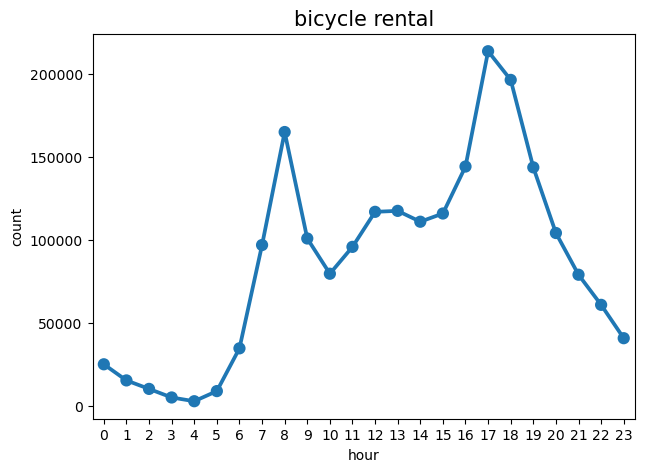

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure( figsize=(7, 5) )

sns.pointplot( data=d, x="hour", y="count" )

plt.title("bicycle rental", fontsize=15, color="black")
plt.show()

In [14]:
d = df.groupby( [ "hour", "workingday" ] ).agg( { "count" : sum } ).reset_index()
d

# workingday(0) : 쉬는날, workingday(1) : 일하는 날

,hour,workingday,count
0,0,0,13701
1,0,1,11387
2,1,0,10427
3,1,1,4945
4,2,0,7686
5,2,1,2573
6,3,0,3677
7,3,1,1414
8,4,0,1239
9,4,1,1593


<function matplotlib.pyplot.show(close=None, block=None)>

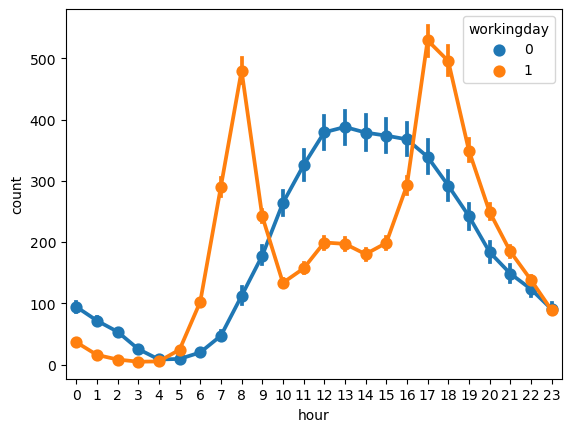

In [20]:
# 그룹을 짓지 않으면 표현 값이 달라 결과 그래프가 달라짐
sns.pointplot( data=df, x="hour", y="count", hue="workingday" )

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

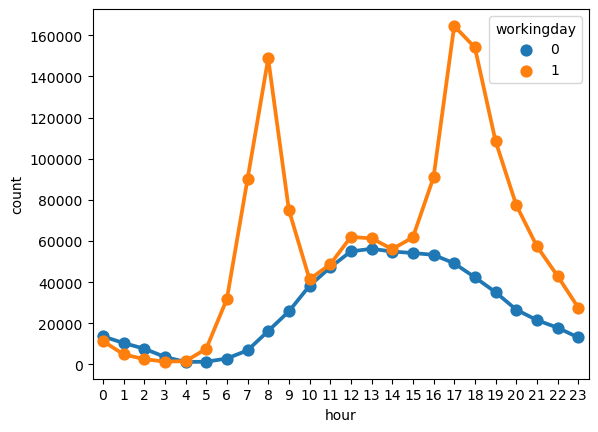

In [15]:
sns.pointplot( data=d, x="hour", y="count", hue="workingday" )

plt.show

In [17]:
d = df.groupby( ["hour", "month"] ).agg( { "count" : sum } ).reset_index()
d

,hour,month,count
0,0,1,852
1,0,2,1096
2,0,3,1249
3,0,4,1480
4,0,5,2441
...,...,...,...
283,23,8,4791
284,23,9,4092
285,23,10,3949
286,23,11,3310


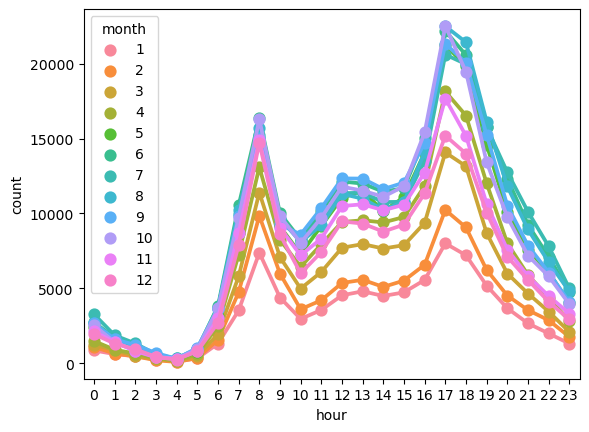

In [19]:
sns.pointplot( data=d, x="hour", y="count", hue="month" )
plt.show()

In [21]:
d = df.groupby( [ "hour", "weather" ] ).agg( { "count" : sum } ).reset_index()
d

# weather : 1(맑음), 2(흐림), 3(가벼운 비, 눈), 4(심한 눈, 비)

,hour,weather,count
0,0,1,18214
1,0,2,6106
2,0,3,768
3,1,1,10397
4,1,2,4246
...,...,...,...
68,22,2,12206
69,22,3,2567
70,23,1,29551
71,23,2,8745


<Axes: xlabel='hour', ylabel='count'>

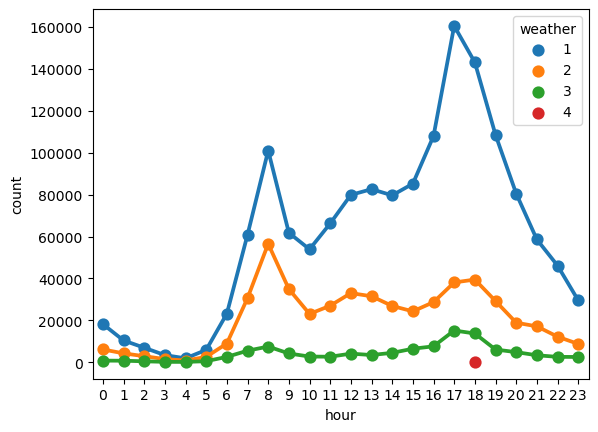

In [22]:
sns.pointplot( data=d, x="hour", y="count", hue="weather" )

<Axes: xlabel='month', ylabel='casual'>

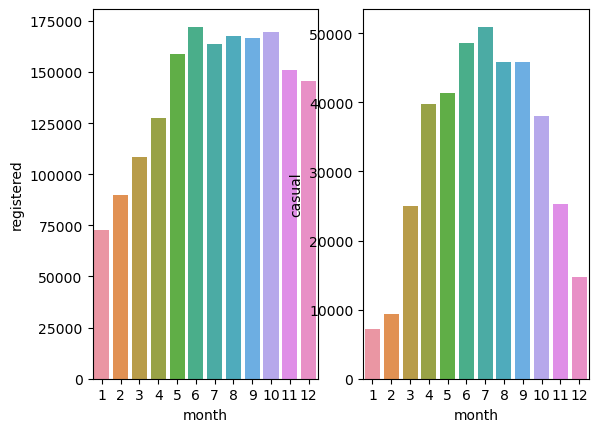

In [29]:
figure, (ax1, ax2) = plt.subplots(ncols = 2)

d = df.groupby("month").agg( { "registered" : sum, "casual" : sum } ).reset_index()
d

sns.barplot( data=d, x="month", y="registered", ax=ax1 )
sns.barplot( data=d, x="month", y="casual", ax=ax2 )

In [30]:
df["temp_int"] = df["temp"].apply(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  temp_int    10886 non-

In [37]:
df["temp_int"].unique()

array([ 9,  8, 13, 15, 14, 17, 18, 16, 12, 10,  6,  5,  7,  4, 11,  3,  2,
       21, 22, 23, 24, 19, 20, 27, 26, 25, 28, 30, 31, 29, 33, 35, 36, 32,
       34, 37, 38,  1,  0, 39, 41], dtype=int64)

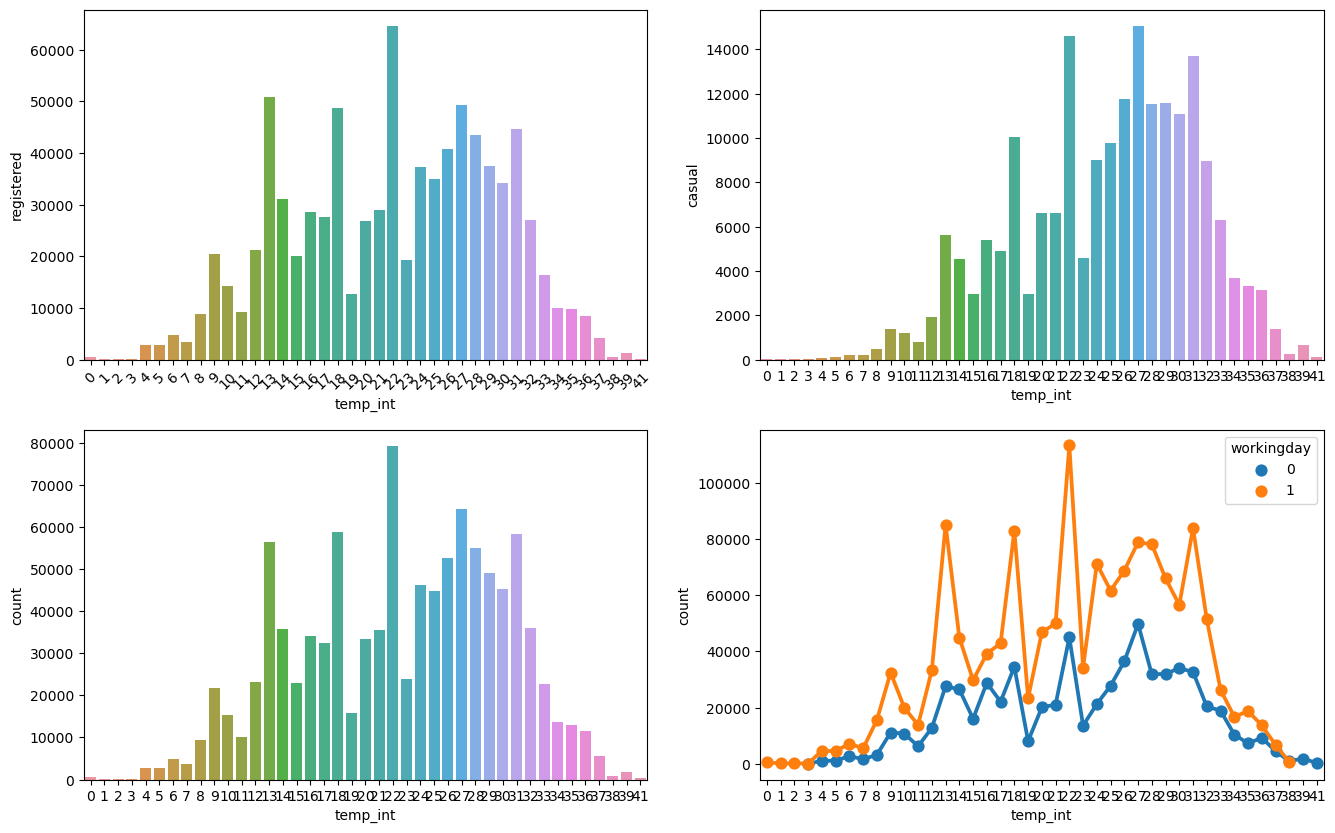

In [48]:
figure, ( (ax1, ax2), (ax3, ax4) ) = plt.subplots(nrows=2, ncols=2)

d = df.groupby( ["temp_int", "workingday"] ).agg( { "registered" : sum, "casual" : sum, "count" : sum } ).reset_index()

ax_sns = sns.barplot( ci=False, data=d, x="temp_int", y="registered", ax=ax1 )
ax_sns.set_xticklabels( ax_sns.get_xticklabels(), rotation=45 )

figure.set_size_inches(16, 10)

sns.barplot( ci=False, data=d, x="temp_int", y="casual", ax=ax2 )
sns.barplot( ci=False, data=d, x="temp_int", y="count", ax=ax3 )

sns.pointplot( data=d, x="temp_int", y="count", hue="workingday" )

plt.show()

In [49]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'temp_int'],
      dtype='object')

In [50]:
f = [ 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour' ]
label = "count"

X, y = df[f], df[label]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3 )

In [52]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit( X_train, y_train )

print("train : ", rfr.score( X_train, y_train ))
print("test : ", rfr.score( X_test, y_test ))

train :  0.9915398809418761
test :  0.942603616660245


In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' :range(5, 100, 10), # 트리개수 설정
    'max_depth' : range(4, 11, 2), # 트리의 최대 깊이 설정
    'min_samples_split' : range(4, 21, 4) # 노드 분할을 위한 최소한의 샘플 개수
}

rfr = RandomForestRegressor()

grid_cv = GridSearchCV( rfr, param_grid=params, cv=3 )
grid_cv.fit( X_train, y_train )

print("최적의 파라미터 : ", grid_cv.best_params_ )
print("train : ", grid_cv.score( X_train, y_train ))
print("test : ", grid_cv.score( X_test, y_test ))

최적의 파라미터 :  {'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 65}
train :  0.952497136673522
test :  0.92515491640873


In [54]:
grid_cv.predict( [ [ 1, 0, 0, 1, 9, 14.02, 80, 0.0, 2011, 1, 1, 2 ] ] )

array([32.00662222])

In [55]:
df_result = pd.DataFrame( { "y_test " : [ 11, 12, 13, 14, 15, 16, 17, 18, 19 ],
                            "line_test" : [ 10, 11, 12, 13, 14, 15, 16, 17, 18 ] } )

df_result

,y_test,line_test
0,11,10
1,12,11
2,13,12
3,14,13
4,15,14
5,16,15
6,17,16
7,18,17
8,19,18


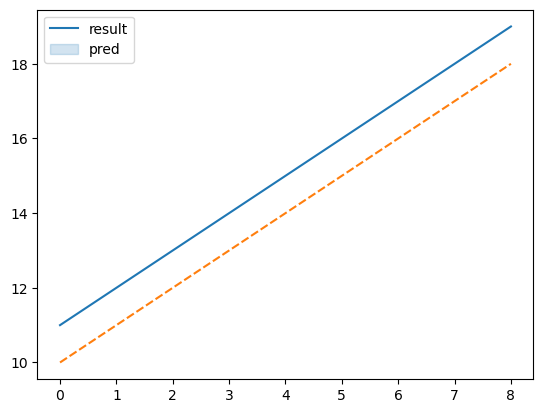

In [59]:
sns.lineplot( data=df_result )
plt.legend( labels=["result", "pred"] )

plt.show()

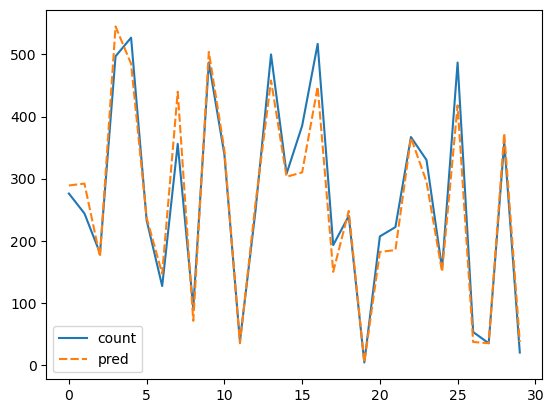

In [65]:
# 0 ~ 30 번째 인덱스만 조회

range_start = 0;
range_end = 30;

pred = grid_cv.predict( X_test )

y_reset = y_test[ range_start : range_end ].reset_index()

y_reset["pred"] = pred[ range_start : range_end ]
y_reset["pred"] = y_reset["pred"].apply(int)

sns.lineplot( data=y_reset[ [ "count", "pred" ] ] )

plt.show()

<Axes: >

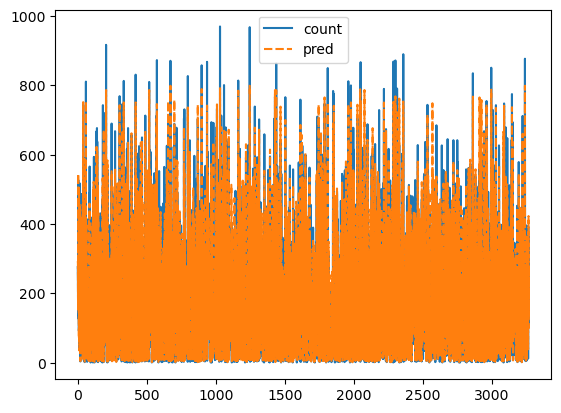

In [66]:
# 모든 데이터 조회

y = y_test.reset_index()
y["pred"] = pred
sns.lineplot(data = y[['count','pred']])